# Measurements in stabilography

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd  # use Pandas to read data from a website
fileUrl = 'http://www.udel.edu/biology/rosewc/kaap686/reserve/cop/copdata.txt'
COP = pd.read_table(fileUrl, skipinitialspace=True, sep=None, engine='python')  # Pandas dataframe
COP = COP.values / 10  # mm to cm
freq = 100
print('COP shape: ', COP.shape)

COP shape:  (4095, 2)


In [3]:
def cop_plot(freq, COP, units='cm'):
    '''
    Plot COP data from postural sway measurement.
    '''
    import matplotlib.gridspec as gridspec
    t = np.linspace(0, COP.shape[0]/freq, COP.shape[0])
    plt.rc('axes', labelsize=16,  titlesize=16)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.figure(figsize=(10, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
    ax1 = plt.subplot(gs[0])
    ax1.plot(t, COP[:,0], lw=2, color=[0, 0, 1, 1], label='ap')
    ax1.plot(t, COP[:,1], lw=2, color=[1, 0, 0, 1], label='ml')
    ax1.set_xlim([t[0], t[-1]])
    ax1.grid()
    ax1.locator_params(axis='both', nbins=5)
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('COP [%s]' %units)
    ax1.set_title('Stabilogram')
    ax1.legend(fontsize=12, loc='best', framealpha=.5)
    ax2 = plt.subplot(gs[1])
    ax2.plot(COP[:,1], COP[:,0], lw=2, color='g')
    ax2.set_xlabel('COP ml [%s]' %units)
    ax2.set_ylabel('COP ap [%s]' %units)
    ax2.set_title('Statokinesigram')
    if 0:  # plot the axes with the same colors of the COP data
        ax2.xaxis.label.set_color('red')
        ax2.spines['bottom'].set_color('red')
        ax2.tick_params(axis='x', colors='red')
        ax2.yaxis.label.set_color('blue')
        ax2.spines['left'].set_color('blue')
        ax2.tick_params(axis='y', colors='blue')
    ax2.grid()
    ax2.locator_params(axis='both', nbins=5)
    plt.tight_layout()
    plt.show()

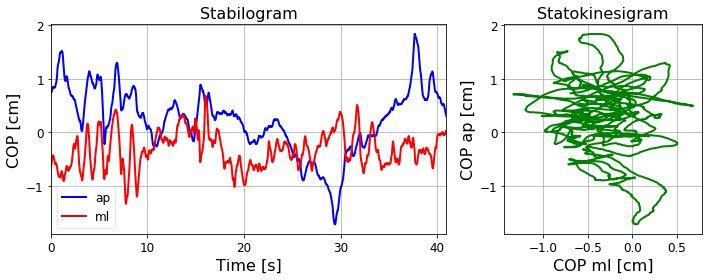

In [4]:
# plot data
cop_plot(freq, COP)